# Web Scraping Data Using Python with Pandas

### Using 'read_html' for scraping data of a webpage

In [4]:
# Web-page used for this exercise is - https://www.basketball-reference.com/leagues/NBA_2024_per_game.html
# Tutorial Video - https://www.youtube.com/watch?v=ooj84UP3r6M
# Reference Github repository - https://github.com/dataprofessor/code/blob/master/python/pandas_read_html_for_webscraping.ipynb

# Building block
year = '2024'
urlstr = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'

# Combining the urlstr and year
url = urlstr.format(year)
url

'https://www.basketball-reference.com/leagues/NBA_2024_per_game.html'

In [10]:
# To get the list of urls by replacing years
years = ['2024', '2023', '2022', '2021']
urlstr = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'
for year in years:
    url = urlstr.format(year)
    print(url)

https://www.basketball-reference.com/leagues/NBA_2024_per_game.html
https://www.basketball-reference.com/leagues/NBA_2023_per_game.html
https://www.basketball-reference.com/leagues/NBA_2022_per_game.html
https://www.basketball-reference.com/leagues/NBA_2021_per_game.html


In [16]:
# Use pandas to read html data
import pandas as pd

In [185]:
# Using only 2023 data
year = '2023'
url = urlstr.format(year)
url
df = pd.read_html(url, header=0)
df[0].shape

(705, 30)

In [178]:
# Let's name the table for 2024 as df2024
df2023 = df[0]
df2023.head(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


In [179]:
# Finding out repeated headers on the webpage
len(df2023[df2023['Age'] == 'Age'])

26

In [180]:
# Cleaning out data by removing duplicate headers
df2023.drop(df2023[df2023['Age'] == 'Age'].index, inplace=True)

In [181]:
df2023.shape

(679, 30)

In [182]:
df2023.head(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


In [183]:
df2023.drop_duplicates(subset=['Player'], keep='first', inplace=True)

In [184]:
df2023.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


In [134]:
df2023.to_excel('2023 NBA Rankings.xlsx', sheet_name='2023')

In [142]:
# Charting the data
import matplotlib.pyplot as plt

In [172]:
df2023.convert_dtypes()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,...,.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
701,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,...,.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
702,537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,...,.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4
703,538,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,...,.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5


In [209]:
##df2023 = df2023.convert_dtypes()
df2023['Age'] = df2023['Age'].astype(int)
df2023['G'] = df2023['G'].astype(int)
df2023['GS'] = df2023['GS'].astype(int)
df2023['Rk'] = df2023['Rk'].astype(int)
df2023['Player'] = df2023['Player'].astype(str)
df2023['Pos'] = df2023['Pos'].astype(str)
df2023['Tm'] = df2023['Tm'].astype(str)
df2023.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [210]:
len(df2023.columns)
i = 7

while i < 30:
   df2023[df2023.columns[i]] = df2023[df2023.columns[i]].astype(float)
   i = i + 1


In [211]:
df2023.dtypes

Rk          int32
Player     object
Pos        object
Age         int32
Tm         object
G           int32
GS          int32
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

In [212]:
df2023.head(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


In [213]:
df2023.to_excel('2023 NBA Rankings.xlsx', sheet_name='2023')

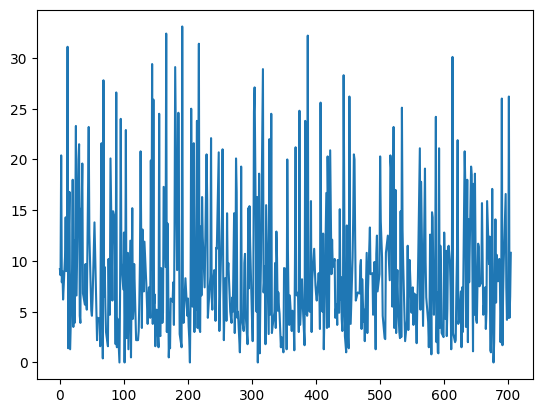

In [220]:
df2023['PTS'].plot()
plt.show()

<Axes: xlabel='FGA', ylabel='PTS'>

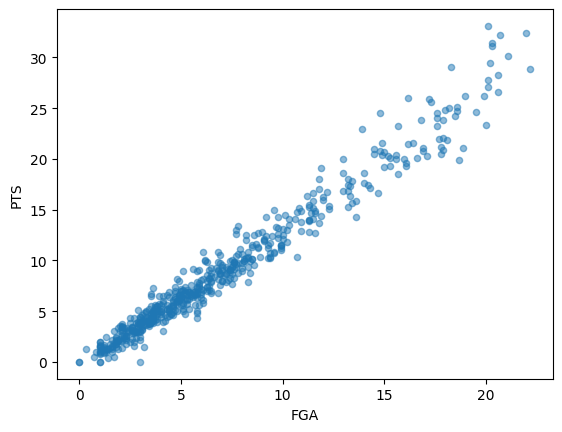

In [225]:
# Creating Scatter chart
df2023.plot.scatter(x="FGA", y='PTS', alpha=0.5)